In [1]:
import numpy as np  # pip install numpy
import cv2

In [18]:
def generate_dataset():
    face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    def face_cropped(img):

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray ,1.3 ,5)

        if faces is ():
            return None
        for(x ,y ,w ,h) in faces:
            cropped_face = img[y: y +h ,x: x +w]
        return cropped_face

    cap = cv2.VideoCapture(0)
    img_id = 0

    while True:
        ret, frame = cap.read()
        if face_cropped(frame) is not None:
            img_id +=1
            face = cv2.resize(face_cropped(frame), (200, 200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
#             file_name_path = "data/" + "aniket." + str(img_id) + ".jpg"
            file_name_path = "images_for_visualisation/"+str(img_id)+".jpg"
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50 ,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0 ,255 ,0), 2)

            cv2.imshow("Cropped_face", face)
            if cv2.waitKey(1) == 13 or int(img_id) == 1000:       # pressing enter will end the program
                break

    cap.release()
    cv2.destroyAllWindows()
    print("Collecting samples is completed !!!")

generate_dataset()



In [5]:
def my_label(image_name):
    name = image_name.split('.')[-3] #sanket.1jpg -> sanket  1 jpg
    # if we have two person in our dataset
    if name=="sanket":
        return np.array([1,0])
    elif name=="aniket":
        return np.array([0,1])

#     # if we have three person in our dataset
#     if name == "sanket":
#         return np.array([1,0,0])
#     elif name== "manisha":
#         return np.array([0,1,0])
#     elif name=="aniket":
#         return np.array([0,0,1])



In [2]:
#create data
import os
from random import shuffle
from tqdm import tqdm

  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
def my_data():
    data = []
    for img in tqdm(os.listdir("data")):
        path=os.path.join("data",img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        data.append([np.array(img_data), my_label(img)])
    shuffle(data)  
    return data

In [7]:
data = my_data()

100%|██████████████████████████████████████████████████████████████████████████████████████| 1018/1018 [00:25<00:00, 40.09it/s]


In [8]:
train = data[:800]  
test = data[800:]
X_train = np.array([i[0] for i in train]).reshape(-1,50,50,1)
print(X_train.shape)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1,50,50,1)
print(X_test.shape)
y_test = [i[1] for i in test]

(800, 50, 50, 1)
(218, 50, 50, 1)


In [9]:
#creating the model
# import warnings
# warnings.filterwarnings('ignore')
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [13]:
tf.compat.v1.reset_default_graph()
convnet = input_data(shape=[50,50,1])
convnet = conv_2d(convnet, 32, 5, activation='relu')
# 32 filters and stride=5 so that the filter will move 5 pixel or unit at a time
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate = 0.001, loss='categorical_crossentropy')
model = tflearn.DNN(convnet, tensorboard_verbose=1)
model.fit(X_train, y_train, n_epoch=10, validation_set=(X_test, y_test), show_metric = True, run_id="FRS" )

Training Step: 129  | total loss: 0.29356 | time: 2.812s
| Adam | epoch: 010 | loss: 0.29356 - acc: 0.9741 -- iter: 768/800
Training Step: 130  | total loss: 0.26576 | time: 4.109s
| Adam | epoch: 010 | loss: 0.26576 - acc: 0.9767 | val_loss: 0.02093 - val_acc: 1.0000 -- iter: 800/800
--


In [34]:
#let's Visualize the data and make predection
def data_for_visulation():
    Vdata = []
    for img in tqdm(os.listdir("images_for_visualisation")):
        path = os.path.join("images_for_visualisation",img)
        img_num = img.split('.')[0]#1.jpg
        img_data = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        Vdata.append([np.array(img_data), img_num])
    shuffle(Vdata)
    return Vdata

In [35]:
Vdata = data_for_visulation()

100%|█████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 149.90it/s]


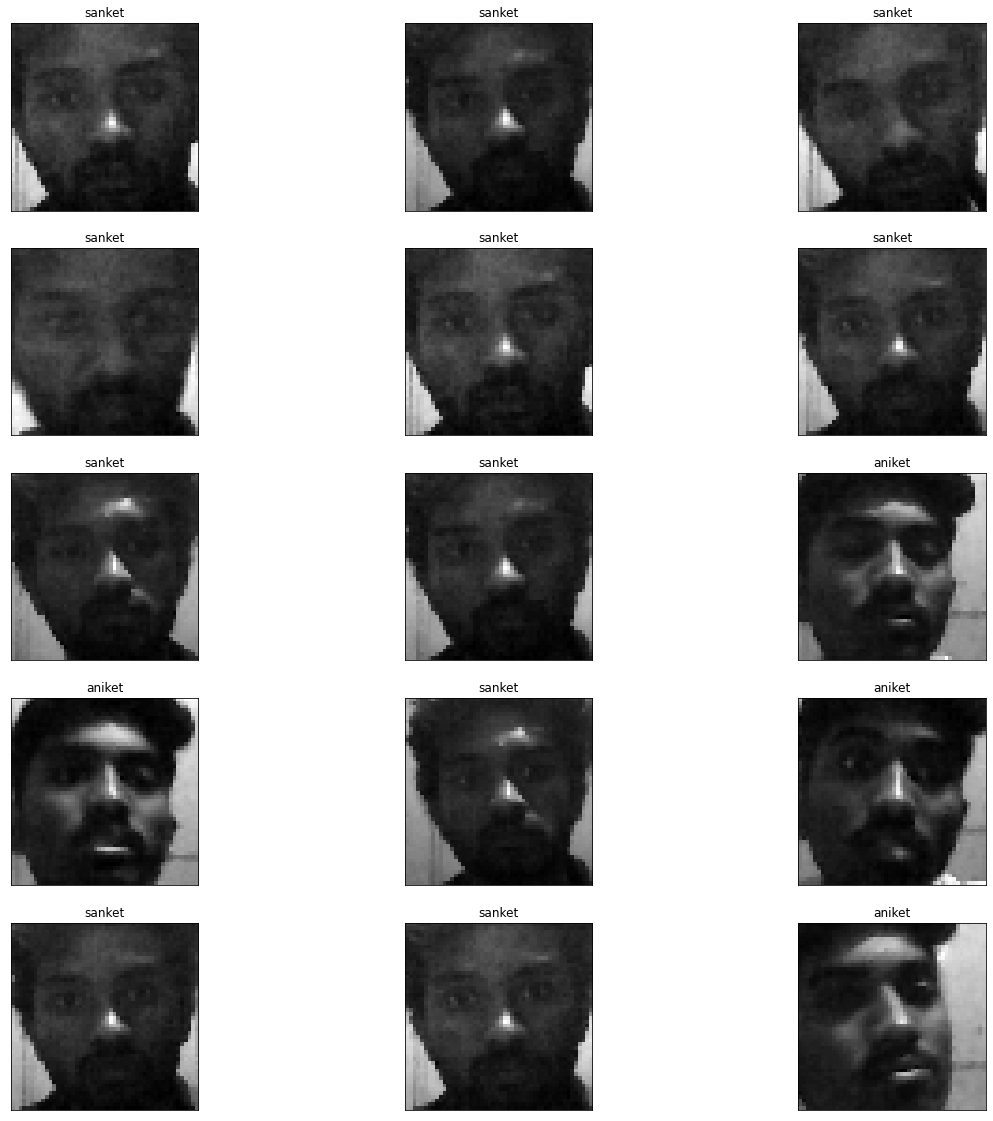

In [36]:
from matplotlib import pyplot as plt   #pip install matplotlib

fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata[:15]):
    img_data = data[0]
    y = fig.add_subplot(5,3,num+1)
    image = img_data
    data = img_data.reshape(50,50,1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 0:
        my_label = "sanket"
    else:
        my_label = "aniket"
    
    y.imshow(image, cmap='gray')
    plt.title(my_label)
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()
    
    

In [31]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
